In [22]:
import sympy as sm
import matplotlib.pyplot as plt

1. Write down a 2-D function, like z= f(x,y), it may be polynomials, sinusoidal, exponential, logarithm …. 

In [4]:
x, y = sm.symbols('x, y')
z = x**2 + y**2

2. Plot the 3-D figure , or 2-D figure (like an image) 

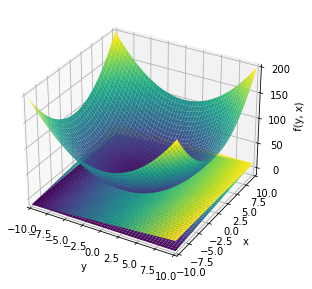

In [8]:
%matplotlib inline
fig = sm.plotting.plot3d(z, x, y)

3. Find the maximal, minimal point and circle them 

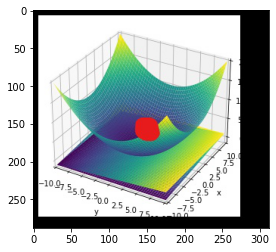

In [24]:
img = plt.imread('hw2_2.jpg')
fig = plt.imshow(img)

4. Find the maximal and minimal point by solving  

In [18]:
dx = z.diff(x)
dx

2*x

In [19]:
dy = z.diff(y)
dy

2*y

In [15]:
sm.solve([dx, dy], x, y, dict=True)

[{x: 0, y: 0}]

### Read the following blog post and practice through it and then write down a notebook and codes for presentation 

#### Case study 1: finding the general form of a function and its inverse 

What’s the inverse of this little quadratic function? We could find it by hand, but let’s just fire up SymPy:

In [30]:
import sympy

# create a symbolic variable for each symbol in our equation
y, x, k = sympy.symbols('y, x, k', real=True)

# define the equation y = kx - (1-k)x^2
fwd_equation = sympy.Eq(y, k*x - (k - 1)*x**2)

# solve the equation for x and print solutions
inverse = sympy.solve(fwd_equation, x)
print('found {} solutions for x:'.format(len(inverse)))
print('\n'.join([str(s) for s in inverse]))

found 2 solutions for x:
(k - sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))
(k + sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))


Let’s see how that first solution looks when we substitute in k=1.5 or k=1.375:

In [26]:
print(inverse[0].subs(k, 1.5).simplify())
print(inverse[0].subs(k, 1.375).simplify())

1.5 - 1.5*sqrt(1 - 0.888888888888889*y)
1.83333333333333 - 1.83333333333333*sqrt(1 - 0.793388429752066*y)


Let’s conclude this example with a nice trick for any users of LaTeX or MathJax: we’ll ask SymPy to typeset the inverse formula for us.

In [27]:
print('x =', sympy.latex(inverse[0]))

x = \frac{k - \sqrt{k^{2} - 4 k y + 4 y}}{2 \left(k - 1\right)}


#### Case study 2: solving systems of equations 

Note that taking the dot product of two planes’ normal vectors gives the negative cosine of their dihedral angle, so the middle constraint above can be expressed as ℓQ∙ℓR=−cosp. Here’s the corresponding SymPy code:

In [28]:
p, q, r = sympy.symbols('p, q, r', real=True)

# create some symbols for unknown elements of lQ
x1, y1, z1 = sympy.symbols('x1, y1, z1')

# define vectors we know so far
P = sympy.Matrix([0, 0, 1])
lR = sympy.Matrix([1, 0, 0])
lQ = sympy.Matrix([x1, y1, z1])

lQ_equations = [
    sympy.Eq(lQ.dot(P), 0),              # lQ contains P
    sympy.Eq(lQ.dot(lR), -sympy.cos(p)), # angle at point P
    sympy.Eq(lQ.dot(lQ), 1)              # lQ is a unit vector
]

S = sympy.solve(lQ_equations, x1, y1, z1, dict=True, simplify=True)
print('found {} solutions for lQ:'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S])) # ask for pretty output

lQ = lQ.subs(S[1])
print('now lQ is {}'.format(lQ))

found 2 solutions for lQ:
{x₁: -cos(p), y₁: -│sin(p)│, z₁: 0}
{x₁: -cos(p), y₁: │sin(p)│, z₁: 0}
now lQ is Matrix([[-cos(p)], [Abs(sin(p))], [0]])


One of SymPy’s quirks is that it sometimes adds extraneous details to solutions like the absolute value above (not needed here because ±sinp and ±|sinp| are equivalent sets of values). Removing these is quick once you notice them. Here’s the code to get rid of the stray Abs:

In [31]:
lQ = lQ.subs(sympy.Abs(sympy.sin(p)), sympy.sin(p))
print('after subbing out abs, lQ is {}'.format(lQ))

after subbing out abs, lQ is Matrix([[-cos(p)], [sin(p)], [0]])


Anyways, let’s manually verify that the solution worked. This is absolutely unnecessary because sympy.solve doesn’t return incorrect solutions, but it can be a nice sanity check, and the code is short, anyways:

In [33]:
print('checking our work:')
print('  lQ . P  =', lQ.dot(P))
print('  lQ . lR =', lQ.dot(lR))
print('  lQ . lQ =', lQ.dot(lQ))

checking our work:
  lQ . P  = 0
  lQ . lR = -cos(p)
  lQ . lQ = sin(p)**2 + cos(p)**2


Oops, looks like that last item could be simplified. Let’s try that again:

In [34]:
print('  lQ . lQ =', lQ.dot(lQ).simplify())

  lQ . lQ = 1


All the constraints were satisfied, and I got to show you sympy.simplify in action.
Now we can go through a similar process to solve for ℓP, except this time we will explicitly encode the unit-length constraint into its z-coordinate.2

In [35]:
x2, y2 = sympy.symbols('x2, y2')
z2 = sympy.sqrt(1 - x2**2 - y2**2)

lP = sympy.Matrix([x2, y2, z2])
print('||lP||^2 =', lP.dot(lP))

lP_equations = [
    sympy.Eq(lP.dot(lR), -sympy.cos(q)),
    sympy.Eq(lP.dot(lQ), -sympy.cos(r)),
]

S = sympy.solve(lP_equations, x2, y2, dict=True, simplify=True)
print('got {} solutions for lP'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S]))

lP = lP.subs(S[0])
print('now lP is {}'.format(lP))

||lP||^2 = 1
got 1 solutions for lP
⎧                 -(cos(p)⋅cos(q) + cos(r)) ⎫
⎨x₂: -cos(q), y₂: ──────────────────────────⎬
⎩                           sin(p)          ⎭
now lP is Matrix([[-cos(q)], [-(cos(p)*cos(q) + cos(r))/sin(p)], [sqrt(-(cos(p)*cos(q) + cos(r))**2/sin(p)**2 - cos(q)**2 + 1)]])


Here’s the relvant GLSL snippet from the shader linked above, reflecting the full solution we obtained:
```
vec3 lr = vec3(1, 0, 0);
vec3 lq = vec3(-cp, sp, 0);
vec3 lp = vec3(-cq, -(cr + cp*cq)/sp, 0);
lp.z = sqrt(1.0 - dot(lp.xy, lp.xy));

vec3 P = normalize(cross(lr, lq));
vec3 Q = normalize(cross(lp, lr));
vec3 R = normalize(cross(lq, lp));
```

SyntaxError: invalid syntax (Temp/ipykernel_16800/3504535105.py, line 1)

#### Case study 3: Jacobians for nonlinear least squares 

We start by just implementing the function f(θ,x,y) defined above:

In [38]:
x, y, u, v, h, s, t, l, rho, phi = sympy.symbols(
    'x, y, u, v, h, s, t, l, rho, phi', real=True)

cr = sympy.cos(rho)
sr = sympy.sin(rho)

xp =  (x - u) * cr + (y - v) * sr
yp = -(x - u) * sr + (y - v) * cr

f = ( h * sympy.exp(-xp**2 / (2*s**2) - yp**2 / (2*t**2) ) *
      sympy.cos( 2 * sympy.pi * xp / l + phi ) )

Next, we can just print out the partial derivatives, one by one. Since we are targeting a C++ program, we can ask SymPy to directly emit C code:

In [39]:
theta = (u, v, h, s, t, l, rho, phi)

for i, var in enumerate(theta):
    deriv = f.diff(var)
    print('grad[{}]'.format(i), '=', sympy.ccode(deriv) + ';')

grad[0] = h*(-((u - x)*sin(rho) + (-v + y)*cos(rho))*sin(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*cos(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*sin(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l)*cos(rho)/l;
grad[1] = h*(((u - x)*sin(rho) + (-v + y)*cos(rho))*cos(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*sin(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin

Instead, we will get SymPy to do the common subexpression elimination for us using sympy.cse:

In [40]:
derivs = [ f.diff(var) for var in theta ]

variable_namer = sympy.numbered_symbols('sigma_')
replacements, reduced = sympy.cse(derivs, symbols=variable_namer)

for key, val in replacements:
    print('double', key, '=', sympy.ccode(val) + ';')

print()

for i, r in enumerate(reduced):
    print('grad[{}]'.format(i), '=', sympy.ccode(r) + ';')

double sigma_0 = cos(rho);
double sigma_1 = 2*sigma_0;
double sigma_2 = -u + x;
double sigma_3 = sin(rho);
double sigma_4 = -v + y;
double sigma_5 = sigma_3*sigma_4;
double sigma_6 = sigma_0*sigma_2 + sigma_5;
double sigma_7 = M_PI/l;
double sigma_8 = 2*sigma_7;
double sigma_9 = phi + sigma_6*sigma_8;
double sigma_10 = pow(s, -2);
double sigma_11 = pow(sigma_6, 2);
double sigma_12 = pow(t, -2);
double sigma_13 = u - x;
double sigma_14 = sigma_0*sigma_4;
double sigma_15 = sigma_13*sigma_3 + sigma_14;
double sigma_16 = pow(sigma_15, 2);
double sigma_17 = exp(-1.0/2.0*sigma_10*sigma_11 - 1.0/2.0*sigma_12*sigma_16);
double sigma_18 = h*sigma_17*sin(sigma_9);
double sigma_19 = sigma_10*sigma_6;
double sigma_20 = sigma_12*sigma_15;
double sigma_21 = sigma_17*cos(sigma_9);
double sigma_22 = h*sigma_21;
double sigma_23 = sigma_18*sigma_8;
double sigma_24 = sigma_2*sigma_3;

grad[0] = sigma_1*sigma_18*sigma_7 + sigma_22*(sigma_0*sigma_19 - sigma_20*sigma_3);
grad[1] = sigma_22*(sigma_0*sigma_20